# Problem Statement

Storm Motors is an e-commerce company who act as mediator between parties interested in selling and buying pre-owned cars.

They have following data about the sellers and cars including

i. Specifications Details
ii. Condition of a car
iii. Sellers details
iv. Registration details
v. Web Advertisement Details 
vi Make and Model information
vii. Price

Storm Motors Wishes to develop an algorithm to predict the price of cars based on various attributes associated with car

In [1]:
#=========================================================================================
# Predicting price of car
#=========================================================================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#===========================================================================================
# Setting Dimensions of plot
#===========================================================================================

sns.set(rc={'figure.figsize':(11.7,8.27)})

#=========================================================================================
# Reading Csv file
#=========================================================================================

import os
os.chdir("/home/harshalkumar/myenv/project1/bin")

cars_data = pd.read_csv('cars_sampled.csv')

#==========================================================================================
# creating copy -- deep copy --changes in cars will not reflect in cars_data
#==========================================================================================

cars = cars_data.copy()

#=========================================================================================
# Explore data -- like dimension , data types etc
#=========================================================================================

# print (cars.shape)

# print (cars.columns)

# print (cars.dtypes)

cars.info()

#=========================================================================================
# Summarize data
#=========================================================================================

print(cars.describe(include="O"))
pd.set_option('display.float_format',lambda x:'%.3f' %x)
print(cars.describe())

#==========================================================================================
# Drop unwanted columns
#=========================================================================================

cols = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns = cols , axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
dateCrawled            50001 non-null object
name                   50001 non-null object
seller                 50001 non-null object
offerType              50001 non-null object
price                  50001 non-null int64
abtest                 50001 non-null object
vehicleType            44813 non-null object
yearOfRegistration     50001 non-null int64
gearbox                47177 non-null object
powerPS                50001 non-null int64
model                  47243 non-null object
kilometer              50001 non-null int64
monthOfRegistration    50001 non-null int64
fuelType               45498 non-null object
brand                  50001 non-null object
notRepairedDamage      40285 non-null object
dateCreated            50001 non-null object
postalCode             50001 non-null int64
lastSeen               50001 non-null object
dtypes: int64(6), object(13)
memory usage:

1000       6
1255       1
1500       2
1910      14
1928       1
1929       1
1933       1
1934       1
1936       2
1938       1
1940       1
1941       1
1943       2
1945       2
1947       2
1950       4
1951       4
1952       3
1953       2
1954       1
1955       6
1956       7
1957       5
1958       4
1959       5
1960      32
1961       7
1962       6
1963      11
1964      16
        ... 
2002    2554
2003    2731
2004    2597
2005    3101
2006    2660
2007    2347
2008    2186
2009    2010
2010    1643
2011    1544
2012    1235
2013     816
2014     623
2015     405
2016    1351
2017    1375
2018     528
2019       2
2222       1
2900       1
3000       1
3500       1
3800       1
5000       3
6000       4
7500       1
7800       1
8500       1
8888       2
9999       7
Name: yearOfRegistration, Length: 97, dtype: int64
26
38


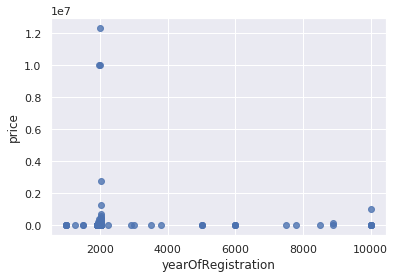

In [2]:
#==========================================================================================
# print unique
#=========================================================================================

#for col in cars.columns:
#    print(cars[col].unique())

#==========================================================================================
# Removing Duplicates
#=========================================================================================   

cars.drop_duplicates(keep='first',inplace=True)

#==========================================================================================
# Data Cleaning
#=========================================================================================

# Number of missing values in each column
cars.isnull().sum()

#variable yearOfRegistration

yearwise_count = cars['yearOfRegistration'].value_counts().sort_index()
print(yearwise_count)

#old=[]
#for year in cars['yearOfRegistration']:
#    old.append(max(cars['yearOfRegistration'])-year)
#    print(old)
    
print(sum(cars['yearOfRegistration'] > 2018))
print(sum(cars['yearOfRegistration'] < 1950))

sns.regplot(x="yearOfRegistration",y="price",scatter=True,fit_reg=False,data=cars)

#working range -- 1950-2018

0           1415
1            172
2              1
3              1
5              4
7              1
8              2
10             5
11             1
12             1
14             1
15             8
20             6
21             1
25             5
26             1
30             7
35             4
39             1
40             3
45             6
50            41
55             3
60             7
65             1
70             2
75             9
77             1
80            12
85             3
            ... 
163991         1
165000         1
169999         1
171000         1
175000         1
179999         1
189981         1
205000         1
214800         1
225000         1
230000         2
239000         1
249000         1
250000         1
257500         1
260000         1
270000         1
300000         1
370000         1
395000         1
485000         1
487000         1
619000         1
700000         1
999999         1
1250000        1
2795000        1
9999999       

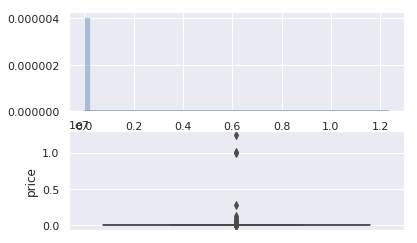

In [3]:
#variable price
price_count = cars['price'].value_counts().sort_index()
print(price_count)
plt.figure(1)
plt.subplot(211)
sns.distplot(cars['price'],kde=True)
cars['price'].describe()
plt.subplot(212)
sns.boxplot(y=cars['price'])
print(sum(cars['price']>150000))
print(sum(cars['price']<100))

#working range -- 100-150000

5565

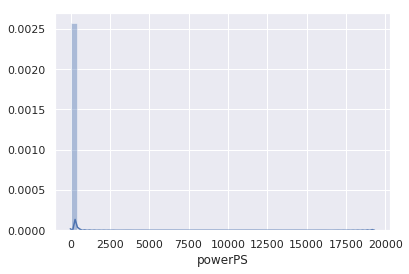

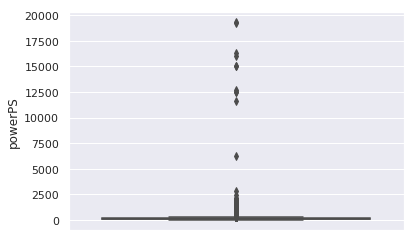

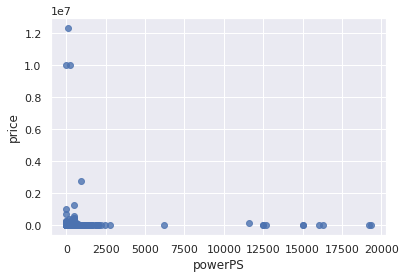

In [4]:
#variable powerPS
price_count = cars['powerPS'].value_counts().sort_index()
plt.figure(1)
#plt.subplot(311)
sns.distplot(cars['powerPS'],kde=True)
cars['powerPS'].describe()
#plt.subplot(312)
plt.figure(2)
sns.boxplot(y=cars['powerPS'])
#plt.subplot(313)
plt.figure(3)
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=False,data=cars)
sum(cars['powerPS']>500)
sum(cars['powerPS']<10)

#Working range -- 10-500

In [5]:
#============================================================================================
# Working range of Data
#============================================================================================

cars = cars[(cars.yearOfRegistration <= 2018) & (cars.yearOfRegistration >=1950) 
        & (cars.price >= 100) & (cars.price <= 150000) & (cars.powerPS >= 10) & (cars.powerPS <= 500)]

print(cars.shape)

#6700 records are dropped

(42772, 14)


In [6]:
#============================================================================================
# Feature engineering
#============================================================================================

# creating new variable using yearOfRegistration and monthOfRegistration

cars['monthOfRegistration']/=12

cars['Age'] = (2018 - cars['yearOfRegistration']) + cars['monthOfRegistration']
cars['Age'] = round(cars['Age'],2)
cars['Age'].describe()
cars.shape
cars.head(10)

#Droping yearOfRegistration and monthOfRegistration
cars = cars.drop(columns=['yearOfRegistration','monthOfRegistration'],axis=1)


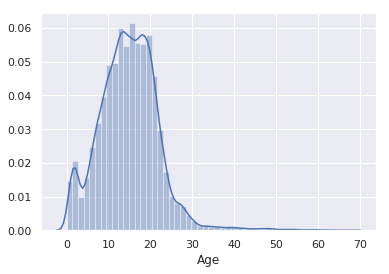

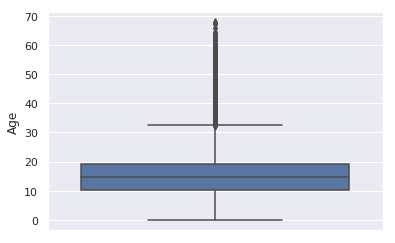

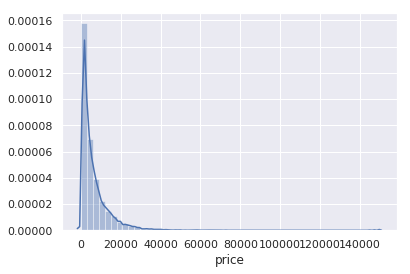

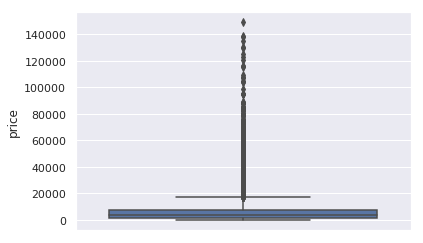

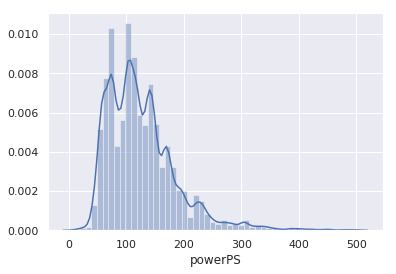

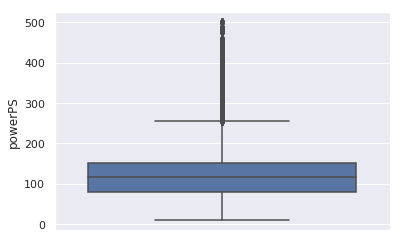

In [8]:
#===========================================================================================
#Visualizing parameters --Univariate 
#===========================================================================================
#Age
plt.figure(1)

sns.distplot(cars['Age'])
plt.figure(2)
sns.boxplot(y=cars['Age'])

#price
plt.figure(3)
sns.distplot(cars['price'])
plt.figure(4)
sns.boxplot(y=cars['price'])

#powerBS
plt.figure(5)
sns.distplot(cars['powerPS'])
plt.figure(6)
sns.boxplot(y=cars['powerPS'])

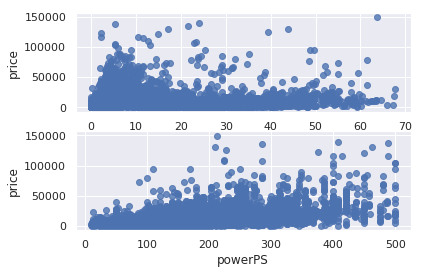

In [9]:
#===========================================================================================
#Visualizing parameters --Bivariate 
#===========================================================================================


#Age vs price
plt.figure(1)
plt.subplot(211)
sns.regplot(x=cars['Age'],y=cars['price'],scatter=True,fit_reg=False,data=cars)

#powerPS vs price
plt.subplot(212)
sns.regplot(x=cars['powerPS'],y=cars['price'],scatter=True,fit_reg=False,data=cars)

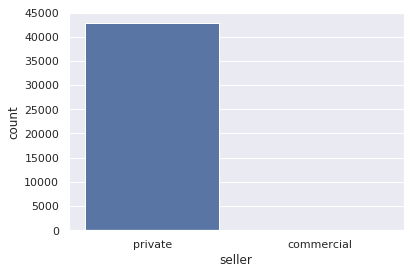

In [10]:
#===========================================================================================
#Visualizing parameters -- categorical measured on nominal scale (diff cats) vs price
#===========================================================================================

#variable--Seller
#cars['seller'].value_counts(normalize=True).plot.bar() or sns.countplot()

cars['seller'].value_counts()

pd.crosstab(index=cars['seller'],columns='count',dropna=True)

#cars['seller'].value_counts().plot.bar()
plt.figure(1)
sns.countplot(x='seller',data=cars)
#fewer cars are commercial--insignificant in analysis

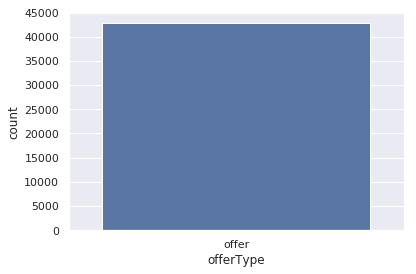

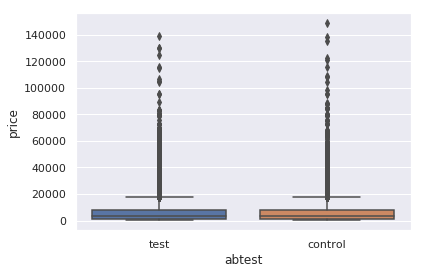

In [11]:
#variable--offerType
cars['offerType'].value_counts()
pd.crosstab(index=cars['offerType'],columns='count',dropna=True)
plt.figure(1)

sns.countplot(x='offerType',data=cars)
#all cars have offer--insignificant in analysis

#variable-- abtest
cars['abtest'].value_counts()
pd.crosstab(index=cars['abtest'],columns='count',dropna=True)
#sns.countplot(x='abtest',data=cars)
# nearly equal distribution so lets plot the boxplot to check how it affects the prices
plt.figure(2)
sns.boxplot(x='abtest',y='price',data=cars)

#boxplot shows -- no effect on price of two different categories of abtest
# so insignificant

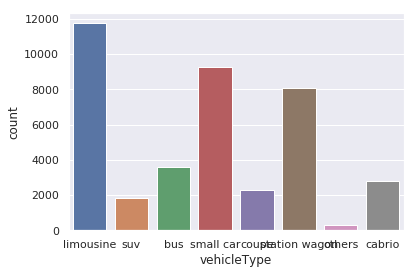

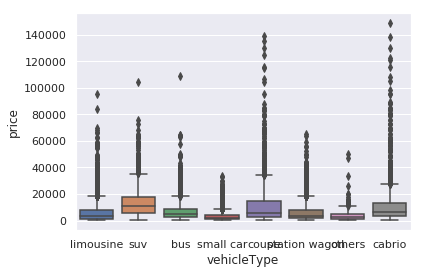

In [12]:
#variable--vehicleType
cars['vehicleType'].value_counts()
pd.crosstab(index=cars['vehicleType'],columns='count',dropna=True)
plt.figure(1)

sns.countplot(x='vehicleType',data=cars)
# nearly equal distribution so lets plot the boxplot to check how it affects the prices
plt.figure(2)
sns.boxplot(x='vehicleType',y='price',data=cars)
#boxplot shows different vehicle type has different prices so this variable affects prices
#so significant

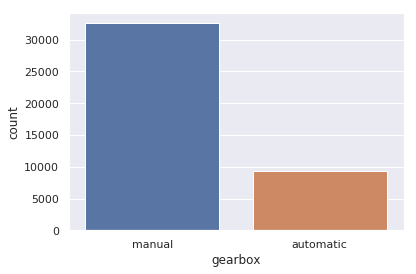

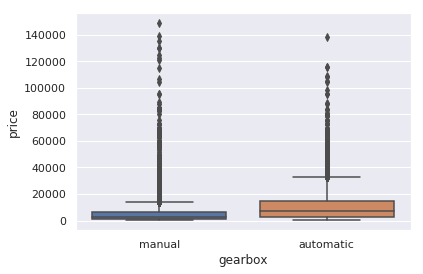

In [13]:
#variable --gearbox
cars['gearbox'].value_counts()
pd.crosstab(index=cars['gearbox'],columns='count',dropna=True)
plt.figure(1)

sns.countplot(x='gearbox',data=cars)
# nearly equal distribution so lets plot the boxplot to check how it affects the prices
plt.figure(2)
sns.boxplot(x='gearbox',y='price',data=cars)
#gearbox affects prices

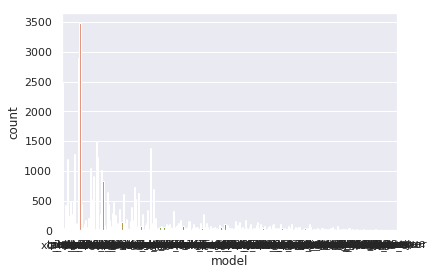

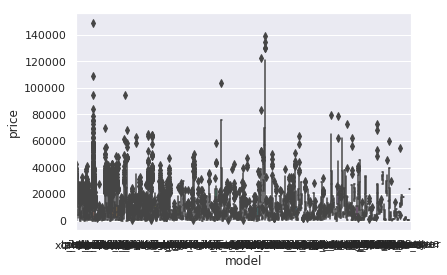

In [14]:
#variable--model
cars['model'].value_counts()
pd.crosstab(index=cars['model'],columns='count',dropna=True)
plt.figure(1)

sns.countplot(x='model',data=cars)
plt.figure(2)
sns.boxplot(x='model',y='price',data=cars)
#considered in modelling

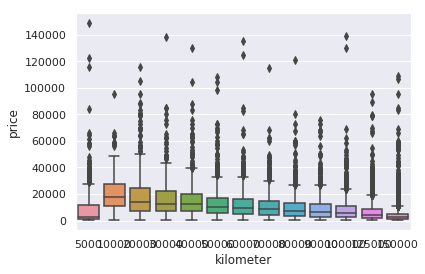

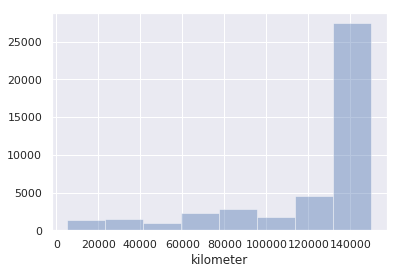

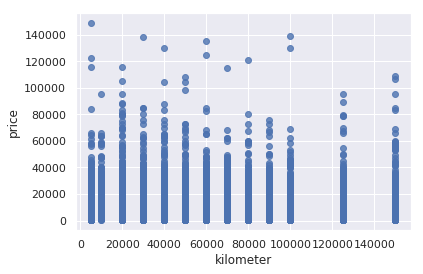

In [15]:
#variable -- kilometer
cars['kilometer'].value_counts().sort_index()
pd.crosstab(index=cars['kilometer'],columns='count',dropna=True)
plt.figure(1)

sns.boxplot(x='kilometer',y='price',data=cars)
cars['kilometer'].describe()
plt.figure(2)
sns.distplot(cars['kilometer'],bins=8,kde=False)
plt.figure(3)
sns.regplot(x='kilometer',y='price',scatter=True,fit_reg=False,data=cars)
# considered in modelling

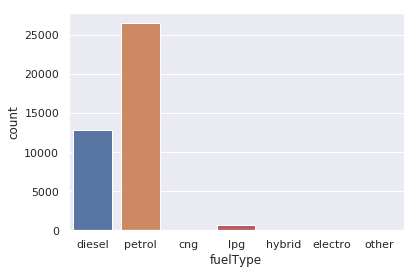

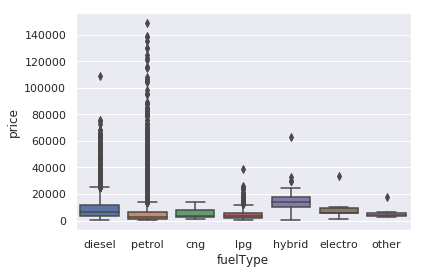

In [16]:
#variable -- fuelType
cars['fuelType'].value_counts()
pd.crosstab(index=cars['fuelType'],columns='count',dropna=True)
plt.figure(1)
sns.countplot(x='fuelType',data=cars)
plt.figure(2)
sns.boxplot(x='fuelType',y='price',data=cars)
#fuelType affects prices

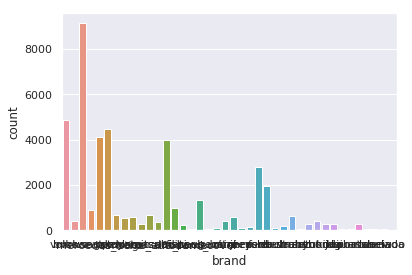

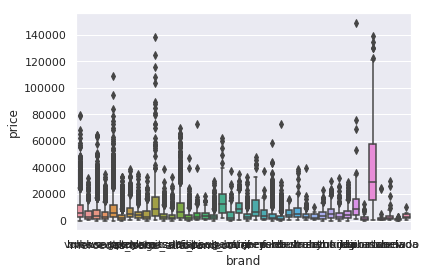

In [17]:
#variable -- brand
cars['brand'].value_counts()
pd.crosstab(index=cars['brand'],columns='count',dropna=True)
plt.figure(1)
sns.countplot(x='brand',data=cars)
plt.figure(2)
sns.boxplot(x='brand',y='price',data=cars)
#cars distributed over different brands
#considered for modelling



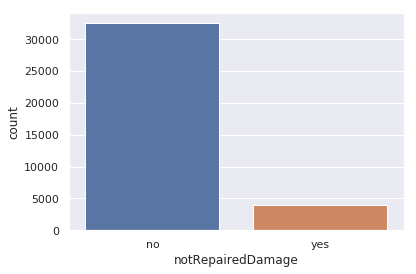

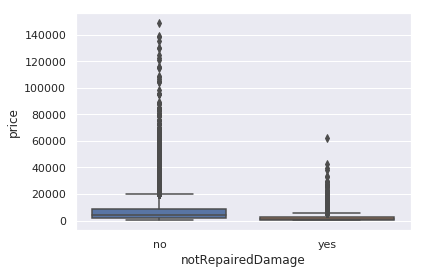

In [18]:
#variable--notRepairedDamage
#yes--car is damaged but not rectified
#no -- car was damaged but has been rectified
cars['notRepairedDamage'].value_counts()
pd.crosstab(index=cars['notRepairedDamage'],columns='count',dropna=True)
plt.figure(1)
sns.countplot(x='notRepairedDamage',data=cars)
plt.figure(2)
sns.boxplot(x='notRepairedDamage',y='price',data=cars)
# cars damaged has lower prices
#significant

In [19]:
#===========================================================================================
# Removing Insignificant variables
#=============================================================================================


cols=['seller','offerType','abtest']
cars=cars.drop(columns=cols,axis=1)
cars_copy=cars.copy()

#==============================================================================================
# Correlation
#===============================================================================================

cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)

price       1.000
powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

In [20]:
#==============================================================================================
#
#""""""
# We are going to build a Linear regression model and Random Forest Model on two sets of data
# 1. Data obtained by ommiting rows with any missing values 
# 2. Data obtained by imputing the missing values
#
#=============================================================================================

cars_omit = cars.dropna(axis=0)

#converting categorical variable to dummies variable,also called encoding
# Suppose we have two categories then we are going to add (2-1=1 new column
# in our dataset.For each row we assign 0 if category unmatch with column label otherwise 0

cars_omit = pd.get_dummies(cars_omit,drop_first=True)
print(cars_omit.shape)
cars_omit.head(10)

(32884, 301)


,price,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,...,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
1,13299,163,150000,13.500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4500,86,60000,13.000,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,18750,185,150000,10.920,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,988,90,150000,23.170,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1399,136,150000,21.920,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4680,122,150000,14.000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,8340,140,125000,13.330,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10,1870,82,150000,17.080,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,2500,105,125000,17.330,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,990,68,150000,17.750,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


       1.Before  2.After
1         13299    9.495
3          4500    8.412
4         18750    9.839
5           988    6.896
7          1399    7.244
8          4680    8.451
9          8340    9.029
10         1870    7.534
11         2500    7.824
12          990    6.898
14         2200    7.696
16         1300    7.170
18          600    6.397
20          680    6.522
22         1599    7.377
23         1000    6.908
24         1100    7.003
25         3999    8.294
26         1290    7.162
27         3900    8.269
28          700    6.551
29         2250    7.719
30         7800    8.962
32        12250    9.413
33         3750    8.230
34         2800    7.937
37        18990    9.852
39         2400    7.783
40         1500    7.313
42        19000    9.852
...         ...      ...
49961     36399   10.502
49962      2299    7.740
49963       300    5.704
49965      4000    8.294
49966      1799    7.495
49967      1900    7.550
49968     17500    9.770
49969      4500    8.412


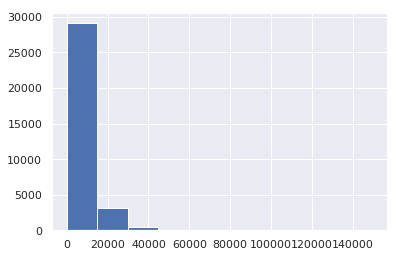

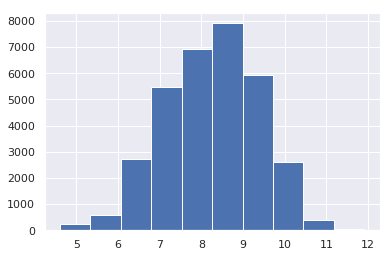

In [21]:
#===========================================================================================
# Importing necessary library
#===========================================================================================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

#===========================================================================================
# Building Model With ommitted data
#===========================================================================================

#seperating input and output features

x1 = cars_omit.drop(['price'],axis='columns',inplace=False)
y1 = cars_omit['price']

#plotting the variable price
prices = pd.DataFrame({"1.Before":y1,"2.After":np.log(y1)})
plt.figure(1)
prices['1.Before'].hist()
print(prices)
plt.figure(2)
prices['2.After'].hist()

#transforming price as a logarithmic value
y1=np.log(y1)

#Splitting data into test and train sets
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

#==========================================================================================
# Baseline for Omitted Data
#==========================================================================================

# We are making a base model by using test data mean value
# This is to set a benchmark and to compare with our regression model


# Finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

# Repeating same value till length of test data
base_pred = np.repeat(base_pred,len(y_test))
print(base_pred)

# finding Root mean square error
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test,base_pred))

print(base_root_mean_square_error)

#here we computed base_root_mean_square_erro.It basically tells that ohow values in y_test are spread
# around its mean.Since Base_pred is our unbiased estimator for y_test variable,RMSE tells how far
# y_test values from base_mean

#thereafter when we fit our model, we again calculate the spread of predicted y around regression line
# if this spread (RMSE) is less than RMSE calculated above,we can conclude that our model fits well and good

[8.43257524 9.78032094 8.84198777 ... 8.7016597  7.50062221 7.90248496]
0.5455481266513847
0.7658615091649239 0.7800936978183916
coefficients: [ 0.  -0.  -0.1  0.4  0.2  0.  -0.1 -0.1 -0.   0.2 -0.  -0.6 -0.9 -0.
 -0.2 -0.5 -0.  -0.   0.2 -0.1 -0.7 -0.2  0.5  0.5 -0.7 -0.1  0.  -0.7
 -0.7 -0.3 -0.3  0.   0.5 -1.1  0.1  0.2  0.5  0.1  0.   0.2  0.  -0.2
 -0.8  0.4 -0.7  0.5 -0.2  0.5 -0.  -0.3  0.  -0.7 -0.2 -0.1 -0.4 -0.2
 -0.2  0.2 -0.3  0.1 -0.5 -0.8 -0.1  0.   0.2  0.   0.1 -0.1 -0.6  0.3
  0.3 -0.2 -0.  -0.3 -0.7 -0.1 -1.  -0.1  0.4  0.6 -0.5 -0.2  0.  -0.5
 -0.7 -0.6 -0.7 -0.2 -0.7 -0.7 -0.2 -0.3 -0.7  0.5  0.2  0.1  0.5  0.4
 -0.3  1.3 -0.8  0.2  0.3  0.1 -0.5 -0.5 -0.7 -1.   0.6  0.1 -0.1 -0.1
  0.1  0.3  0.2 -0.5 -0.8  0.2  0.9 -0.6  0.1  0.1 -0.4 -0.3 -0.4  0.
 -0.5  0.4  0.3 -0.1 -0.3  0.4 -0.4  0.3  0.2 -0.6 -0.5  0.4  2.  -0.
 -0.3 -0.6  0.2 -1.  -0.2 -1.3 -0.4  0.3 -0.  -0.2 -0.6 -0.9 -0.5 -0.7
  1.3 -0.5 -0.9 -0.3 -0.1  0.3 -0.6 -0.4 -2.1  0.1  1.2  0.3  0.3  0.8
  0.3 -0

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

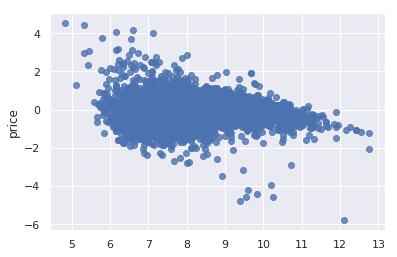

In [22]:
#==========================================================================================
# Linear regression with omitted data
#===========================================================================================

# Setting intercept as true
lgr = LinearRegression(fit_intercept=True)


#Model
model_lin1=lgr.fit(x_train,y_train)
#print("coefficient term=",model_lin1.coef_)
#print("intercept term=",model_lin1.intercept_)
# Predicting model on test data
cars_predictions_lin1 = lgr.predict(x_test)
print(cars_predictions_lin1)

#computing MSE and RMSE
lin1_mse = mean_squared_error(y_test,cars_predictions_lin1)
lin1_rmse = np.sqrt(lin1_mse)
print(lin1_rmse)

#look at our benchmark rmse and lin1_rmse,these are 1.12 and 0.54 respectively.That is spread aound regression
# line is smaller than benchmark rmse.This means that our y_test vals are clustered around regression line
# and regression model fitted very well 

#R_squared value
r2_lin_test1 = model_lin1.score(x_test,y_test)
r2_lin_train1 = model_lin1.score(x_train,y_train)
print(r2_lin_test1,r2_lin_train1)

#Retrieving intercepts and coefficient terms
print("coefficients:",np.round(model_lin1.coef_,1))
print("Intercept:",np.round(model_lin1.intercept_,1))

#r2 values for both sets are approaching 1 or nearer to 1
# r2 = 1 - sse/sst === the term sse/sst tells that proportion of variation out of total variation 
# remained unexplianed by our model
# 1 indicates total variation and we substract unexplained variation by our model from 1
# so r2 basically tells % of variation explained by our model


# Regression Diagonistics -- residual plot analysis -- plot residuals vs predicted values
# Remember our assumptions of regression
# 1. There is linear relationship in x and y
# 2. Homoscedasticity : Errors should have same variance
# 3. Normality : Errors should be normally distributed
# 4. Outliers : Are there bad mesurements in data

# Here in residual analysis we check 2nd Assumption

residuals = y_test - cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1,y=residuals,scatter=True,fit_reg=False)
residuals.describe()


In [23]:
# Building Regression Model using statsmodel module --
# Here we are using different metrics to check goodness of fit 

import statsmodels.api as sm
import statsmodels.formula.api as smf

#fit regression model
reg_model = smf.ols('np.log(y1)~powerPS+kilometer+Age',data=cars_omit).fit()

#Assess model
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:             np.log(y1)   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                 1.569e+04
Date:                Sun, 28 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:27:59   Log-Likelihood:                 32031.
No. Observations:               32884   AIC:                        -6.405e+04
Df Residuals:                   32880   BIC:                        -6.402e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2051      0.002   1021.806      0.0

In [ ]:
#===============================================================================
# Random Forest With ommitted data
#===============================================================================
